In [1]:
import pandas as pd
import datetime 
import holidays
from collections import ChainMap
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
# Helpers to format and locate ticks for dates
from matplotlib.dates import DateFormatter, DayLocator
import matplotlib.dates as mdates
from pmdarima.arima import auto_arima
from pmdarima.arima import ADFTest

In [2]:
data_cleaned=pd.read_csv("dati_con_fest.csv", index_col=0, parse_dates=True, squeeze=True)
data_cleaned["Date"]= pd.to_datetime(data_cleaned["Date"])
series1=pd.DataFrame({'x_values': data_cleaned["Date"], 'y_values': data_cleaned["Vendite_1"]})
series1=series1.set_index("x_values")
train=series1[:1302] #5/6 del dataset per tenere conto del covid
test=series1[1302:1563] #1/6 del dataset


In [3]:
import pmdarima as pm

m1 = pm.auto_arima(train,start_p=0,d=1,start_q=0,max_p=5,max_d=5,max_q=5,
                      start_P=0,D=1,start_Q=0,max_P=5,max_D=5,max_Q=5,
                      m=1,seasonal=True, error_action="warn",trace=True,supress_warnings=True,
                      stepwise=True,random_state=20,n_fits=50
                      )

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=24137.562, Time=0.19 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=24133.812, Time=0.22 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=24115.650, Time=0.29 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=24135.562, Time=0.06 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=24057.455, Time=1.99 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=23422.668, Time=2.69 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=23890.207, Time=0.30 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=23409.484, Time=3.66 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=23876.528, Time=0.41 sec
 ARIMA(4,1,1)(0,0,0)[0] intercept   : AIC=23089.048, Time=3.04 sec
 ARIMA(4,1,0)(0,0,0)[0] intercept   : AIC=23691.176, Time=0.55 sec
 ARIMA(5,1,1)(0,0,0)[0] intercept   : AIC=22602.719, Time=2.63 sec
 ARIMA(5,1,0)(0,0,0)[0] intercept   : AIC=22858.067, Time=1.21 sec
 ARIMA(5,1,2)(0,0,0)[0] intercept   : AIC=22412.704, Time=5.39 sec
 ARIMA(4,1,2)(0,0,0

In [9]:
m1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 1302
Model:               SARIMAX(5, 1, 5)   Log Likelihood              -11084.945
Date:                Thu, 01 Jul 2021   AIC                          22191.891
Time:                        15:51:52   BIC                          22248.771
Sample:                             0   HQIC                         22213.232
                               - 1302                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.7945      0.062     12.851      0.000       0.673       0.916
ar.L2         -1.4304      0.049    -29.032      0.000      -1.527      -1.334
ar.L3          0.8095      0.087      9.337      0.000       0.640       0.979
ar.L4         -0.9775      0.050    -19.478      0.000      -1.076      -0.879
ar.L5          0.0094      0.059      0.160      0.873      -0.106       0.125
ma.L1         -1.3889      0.058    -23.894      0.000      -1.503      -1.275
ma.L2          1.6876      0.071     23.638      0.000       1.548       1.828
ma.L3         -1.5735      0.075    -21.038      0.000      -1.720      -1.427
ma.L4          1.1950      0.063     19.105      0.000       1.072       1.318
ma.L5         -0.5024      0.044    -11.508      0.000      -0.588      -0.417
sigma2      1.833e+06   3.69e-08   4.97e+13      0.000    1.83e+06    1.83e+06
===================================================================================
Ljung-Box (Q):                      170.83   Jarque-Bera (JB):              1065.07
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               0.69   Skew:                             0.27
Prob(H) (two-sided):                  0.00   Kurtosis:                         7.40
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 2.07e+30. Standard errors may be unstable.
"""

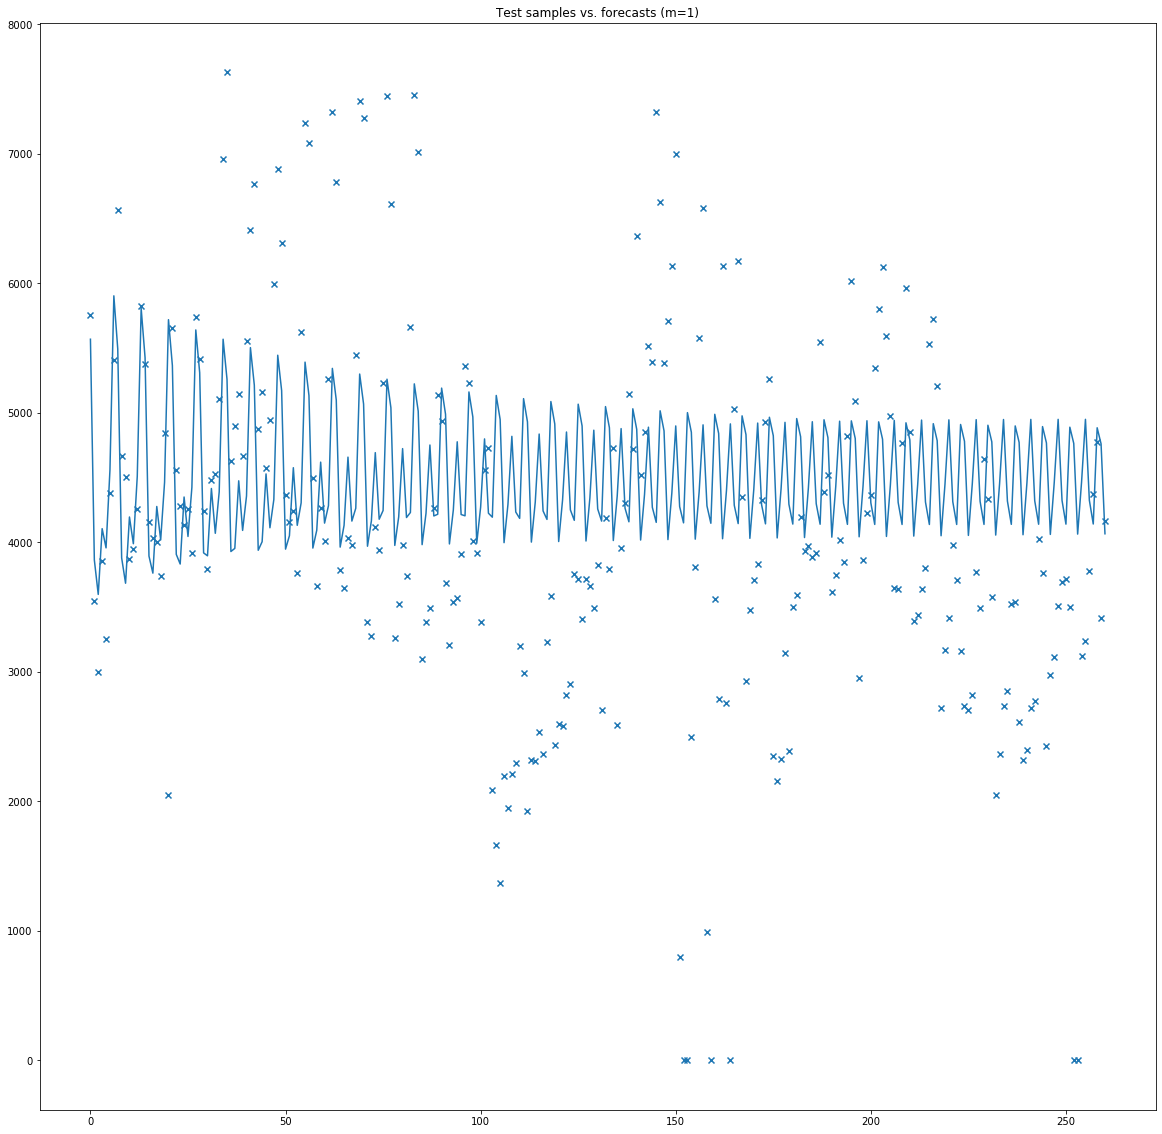

In [10]:
import matplotlib.pyplot as plt

plt.figure(figsize=(20,20))
x = np.arange(test.shape[0])

# Plot m=1
plt.scatter(x, test, marker='x')
plt.plot(x, m1.predict(n_periods=test.shape[0]))
plt.title('Test samples vs. forecasts (m=1)')

plt.show()

In [11]:
prediction=pd.DataFrame(m1.predict(n_periods=261), index=test.index)
prediction.columns=["predicted_sales"]
prediction

,predicted_sales
x_values,
2020-07-26,5567.324375
2020-07-27,3863.401798
2020-07-28,3597.204645
2020-07-29,4104.863798
2020-07-30,3956.546001
...,...
2021-04-08,4324.159974
2021-04-09,4140.806475
2021-04-10,4883.745743


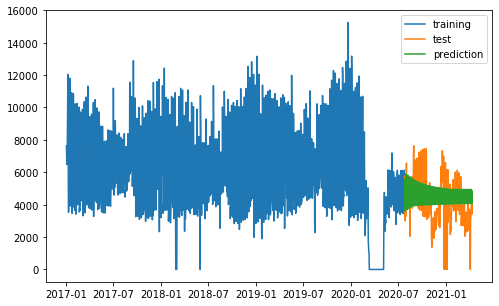

In [12]:
plt.figure(figsize=(8,5))

plt.plot(train,label="training")
plt.plot(test,label="test")
plt.plot(prediction,label="prediction")

plt.legend(loc="best")
plt.show()

In [13]:
from sklearn.metrics import r2_score
test["predicted_sales"]=prediction

In [15]:
r2_score(test["y_values"],test["predicted_sales"])

-0.0016034665732196363

### Restaurand 2


In [16]:
series2=pd.DataFrame({'x_values': data_cleaned["Date"], 'y_values': data_cleaned["Vendite_2"]})
series2=series2.set_index("x_values")
train=series2[:1302] #5/6 del dataset per tenere conto del covid
test=series2[1302:1563] #1/6 del dataset


In [17]:
m2 = pm.auto_arima(train,start_p=0,d=1,start_q=0,max_p=5,max_d=5,max_q=5,
                      start_P=0,D=1,start_Q=0,max_P=5,max_D=5,max_Q=5,
                      m=1,seasonal=True, error_action="warn",trace=True,supress_warnings=True,
                      stepwise=True,random_state=20,n_fits=50
                      )

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=23754.412, Time=0.10 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=23739.929, Time=0.19 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=23713.128, Time=0.26 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=23752.413, Time=0.05 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=23684.634, Time=0.95 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=23090.144, Time=1.97 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=23548.991, Time=0.36 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=23050.704, Time=3.33 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=23504.705, Time=0.39 sec
 ARIMA(4,1,1)(0,0,0)[0] intercept   : AIC=22784.420, Time=2.24 sec
 ARIMA(4,1,0)(0,0,0)[0] intercept   : AIC=23286.351, Time=0.58 sec
 ARIMA(5,1,1)(0,0,0)[0] intercept   : AIC=22366.905, Time=2.28 sec
 ARIMA(5,1,0)(0,0,0)[0] intercept   : AIC=22506.433, Time=0.88 sec
 ARIMA(5,1,2)(0,0,0)[0] intercept   : AIC=22247.879, Time=4.53 sec
 ARIMA(4,1,2)(0,0,0

In [18]:
m2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 1302
Model:               SARIMAX(5, 1, 5)   Log Likelihood              -11005.522
Date:                Thu, 01 Jul 2021   AIC                          22035.043
Time:                        16:11:54   BIC                          22097.094
Sample:                             0   HQIC                         22058.324
                               - 1302                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.7055     17.099     -0.100      0.921     -35.219      31.808
ar.L1          0.9355      0.063     14.916      0.000       0.813       1.058
ar.L2         -1.5427      0.049    -31.428      0.000      -1.639      -1.447
ar.L3          1.0014      0.088     11.348      0.000       0.828       1.174
ar.L4         -1.0924      0.049    -22.086      0.000      -1.189      -0.995
ar.L5          0.1401      0.060      2.348      0.019       0.023       0.257
ma.L1         -1.4613      0.055    -26.691      0.000      -1.569      -1.354
ma.L2          1.7997      0.060     30.238      0.000       1.683       1.916
ma.L3         -1.6795      0.068    -24.704      0.000      -1.813      -1.546
ma.L4          1.3461      0.057     23.690      0.000       1.235       1.458
ma.L5         -0.5416      0.045    -12.154      0.000      -0.629      -0.454
sigma2      1.449e+06      0.001   1.24e+09      0.000    1.45e+06    1.45e+06
===================================================================================
Ljung-Box (Q):                       61.90   Jarque-Bera (JB):              3882.21
Prob(Q):                              0.01   Prob(JB):                         0.00
Heteroskedasticity (H):               1.03   Skew:                             0.56
Prob(H) (two-sided):                  0.76   Kurtosis:                        11.39
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 1.88e+24. Standard errors may be unstable.
"""

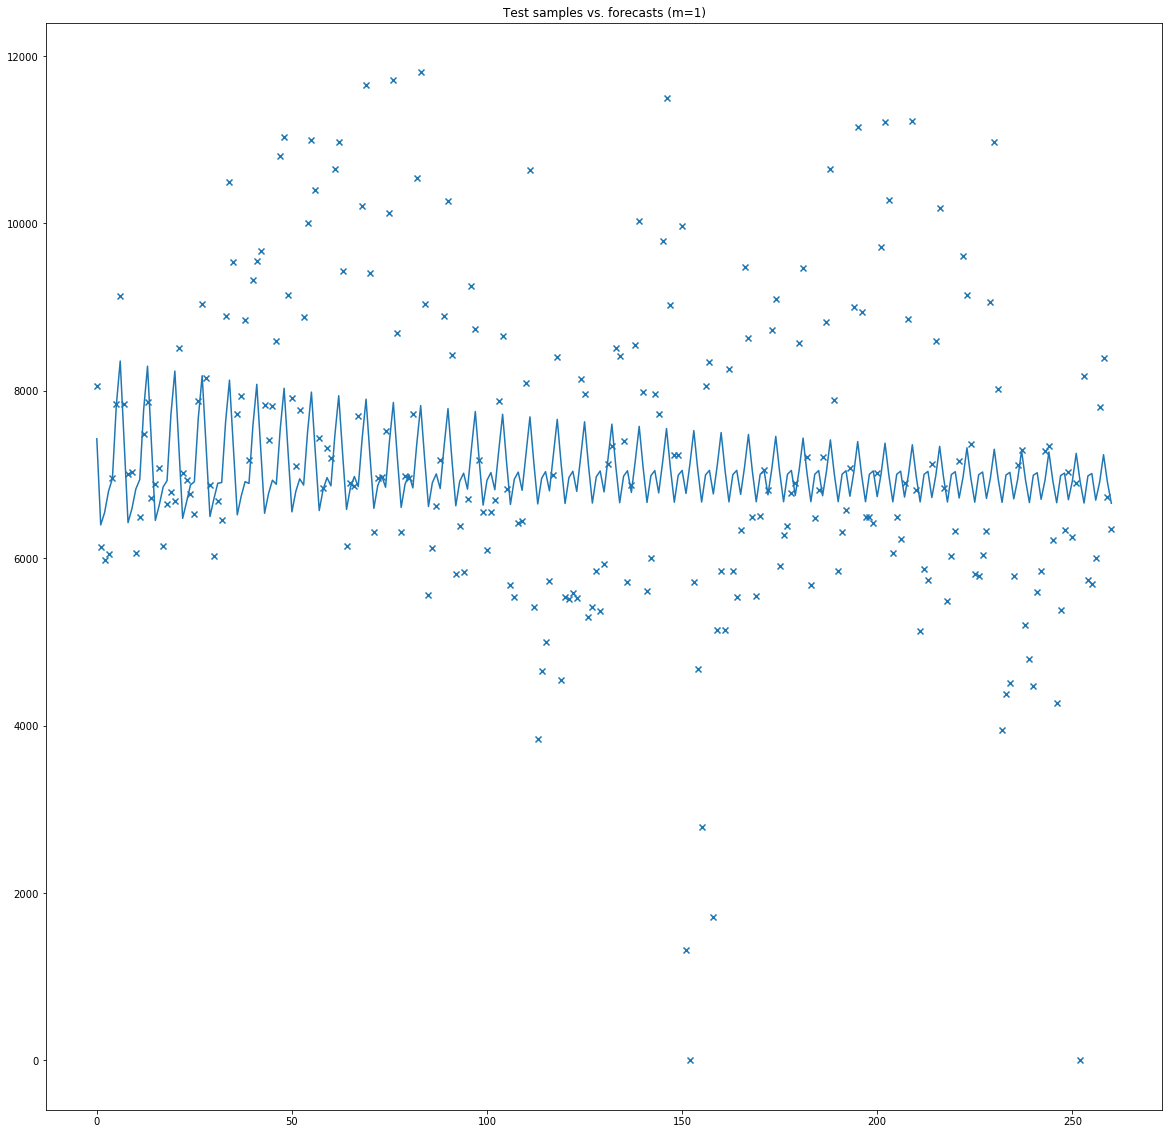

In [19]:

plt.figure(figsize=(20,20))
x = np.arange(test.shape[0])

# Plot m=1
plt.scatter(x, test, marker='x')
plt.plot(x, m2.predict(n_periods=test.shape[0]))
plt.title('Test samples vs. forecasts (m=1)')

plt.show()

In [21]:
prediction=pd.DataFrame(m2.predict(n_periods=261), index=test.index)
prediction.columns=["predicted_sales"]
prediction

,predicted_sales
x_values,
2020-07-26,7426.457917
2020-07-27,6397.604419
2020-07-28,6545.777939
2020-07-29,6799.422681
2020-07-30,6951.957374
...,...
2021-04-08,6693.367982
2021-04-09,6907.465475
2021-04-10,7236.760864


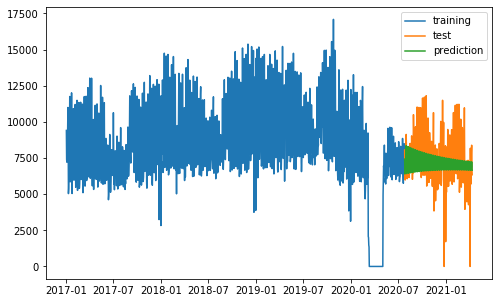

In [22]:
plt.figure(figsize=(8,5))

plt.plot(train,label="training")
plt.plot(test,label="test")
plt.plot(prediction,label="prediction")

plt.legend(loc="best")
plt.show()

In [23]:
from sklearn.metrics import r2_score
test["predicted_sales"]=prediction
r2_score(test["y_values"],test["predicted_sales"])

C:\Users\Lilia\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


0.1603844576596405

### Restaurant 4

In [24]:
series4=pd.DataFrame({'x_values': data_cleaned["Date"], 'y_values': data_cleaned["Vendite_4"]})
series4=series4.set_index("x_values")
train=series4[:1302] #5/6 del dataset per tenere conto del covid
test=series4[1302:1563] #1/6 del dataset


In [25]:
m4 = pm.auto_arima(train,start_p=0,d=1,start_q=0,max_p=5,max_d=5,max_q=5,
                      start_P=0,D=1,start_Q=0,max_P=5,max_D=5,max_Q=5,
                      m=1,seasonal=True, error_action="warn",trace=True,supress_warnings=True,
                      stepwise=True,random_state=20,n_fits=50
                      )

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=21040.286, Time=0.14 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=20923.721, Time=0.41 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=20668.721, Time=0.97 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=21038.305, Time=0.04 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=20604.431, Time=1.45 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=20587.530, Time=2.50 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=20814.674, Time=0.33 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=20584.231, Time=3.61 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=20779.647, Time=0.24 sec
 ARIMA(4,1,1)(0,0,0)[0] intercept   : AIC=20545.068, Time=2.42 sec
 ARIMA(4,1,0)(0,0,0)[0] intercept   : AIC=20727.597, Time=0.40 sec
 ARIMA(5,1,1)(0,0,0)[0] intercept   : AIC=20460.289, Time=1.21 sec
 ARIMA(5,1,0)(0,0,0)[0] intercept   : AIC=20547.603, Time=0.59 sec
 ARIMA(5,1,2)(0,0,0)[0] intercept   : AIC=20407.816, Time=2.19 sec
 ARIMA(4,1,2)(0,0,0

In [26]:
m4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 1302
Model:               SARIMAX(4, 1, 5)   Log Likelihood              -10152.996
Date:                Thu, 01 Jul 2021   AIC                          20325.993
Time:                        16:17:28   BIC                          20377.701
Sample:                             0   HQIC                         20345.393
                               - 1302                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.8115      0.014     59.030      0.000       0.785       0.838
ar.L2         -1.4260      0.020    -70.995      0.000      -1.465      -1.387
ar.L3          0.7756      0.022     35.705      0.000       0.733       0.818
ar.L4         -0.9680      0.015    -62.969      0.000      -0.998      -0.938
ma.L1         -1.5659      0.021    -75.913      0.000      -1.606      -1.525
ma.L2          1.9893      0.047     42.223      0.000       1.897       2.082
ma.L3         -1.7561      0.063    -28.062      0.000      -1.879      -1.633
ma.L4          1.4169      0.051     27.770      0.000       1.317       1.517
ma.L5         -0.6545      0.026    -25.360      0.000      -0.705      -0.604
sigma2      4.217e+05   7717.997     54.645      0.000    4.07e+05    4.37e+05
===================================================================================
Ljung-Box (Q):                      135.46   Jarque-Bera (JB):             11900.81
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               1.28   Skew:                            -1.54
Prob(H) (two-sided):                  0.01   Kurtosis:                        17.49
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

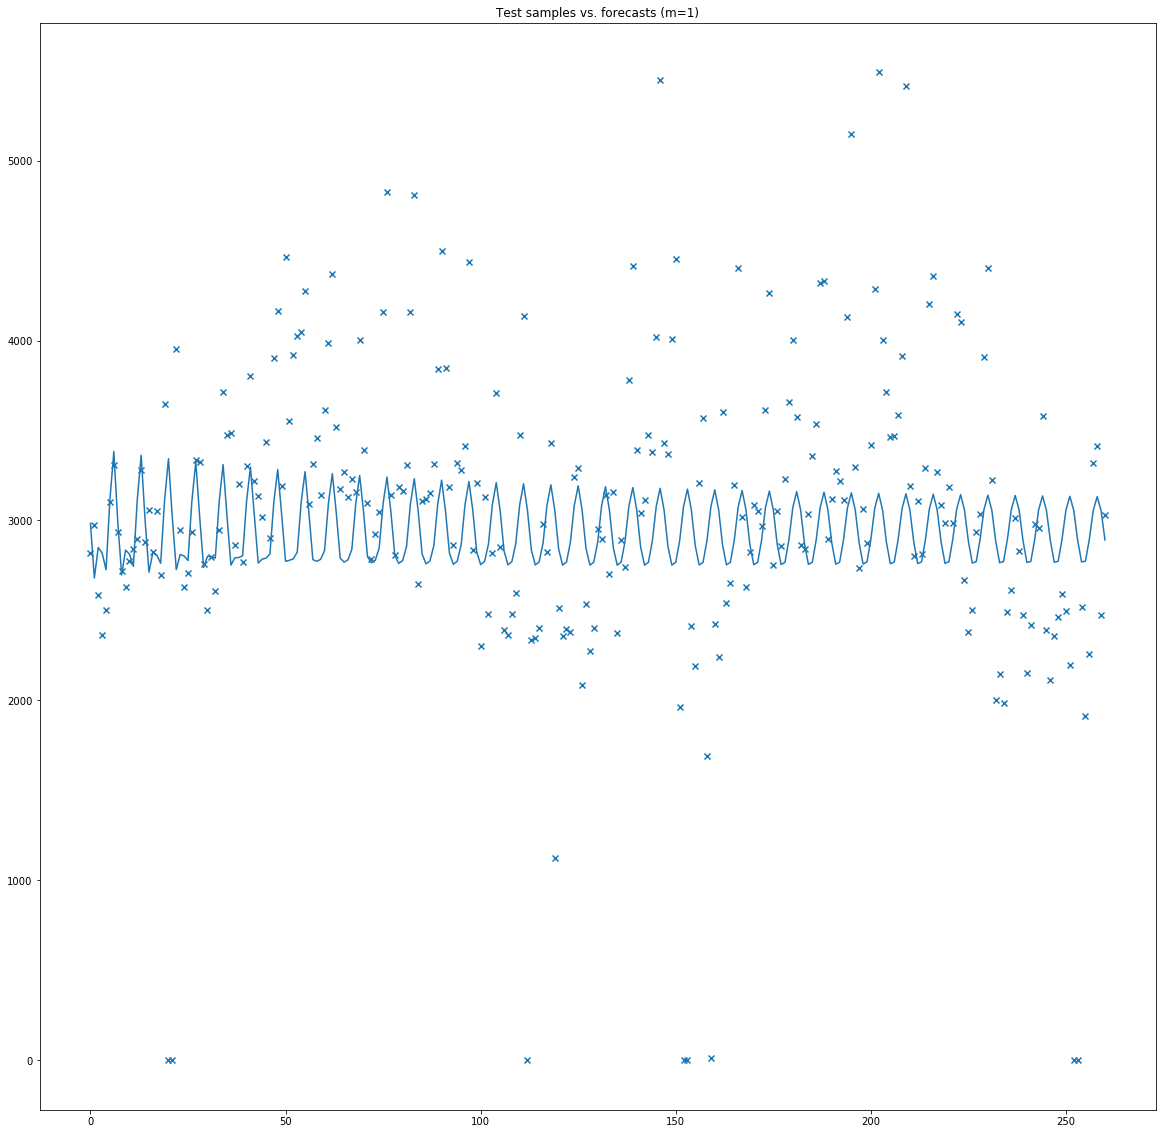

In [30]:
plt.figure(figsize=(20,20))
x = np.arange(test.shape[0])

# Plot m=1
plt.scatter(x, test, marker='x')
plt.plot(x, m4.predict(n_periods=test.shape[0]))
plt.title('Test samples vs. forecasts (m=1)')

plt.show()

In [31]:
prediction=pd.DataFrame(m4.predict(n_periods=261), index=test.index)
prediction.columns=["predicted_sales"]
prediction

,predicted_sales
x_values,
2020-07-26,2983.137203
2020-07-27,2680.532288
2020-07-28,2850.119963
2020-07-29,2819.071144
2020-07-30,2726.116738
...,...
2021-04-08,2896.027381
2021-04-09,3056.456630
2021-04-10,3132.136070


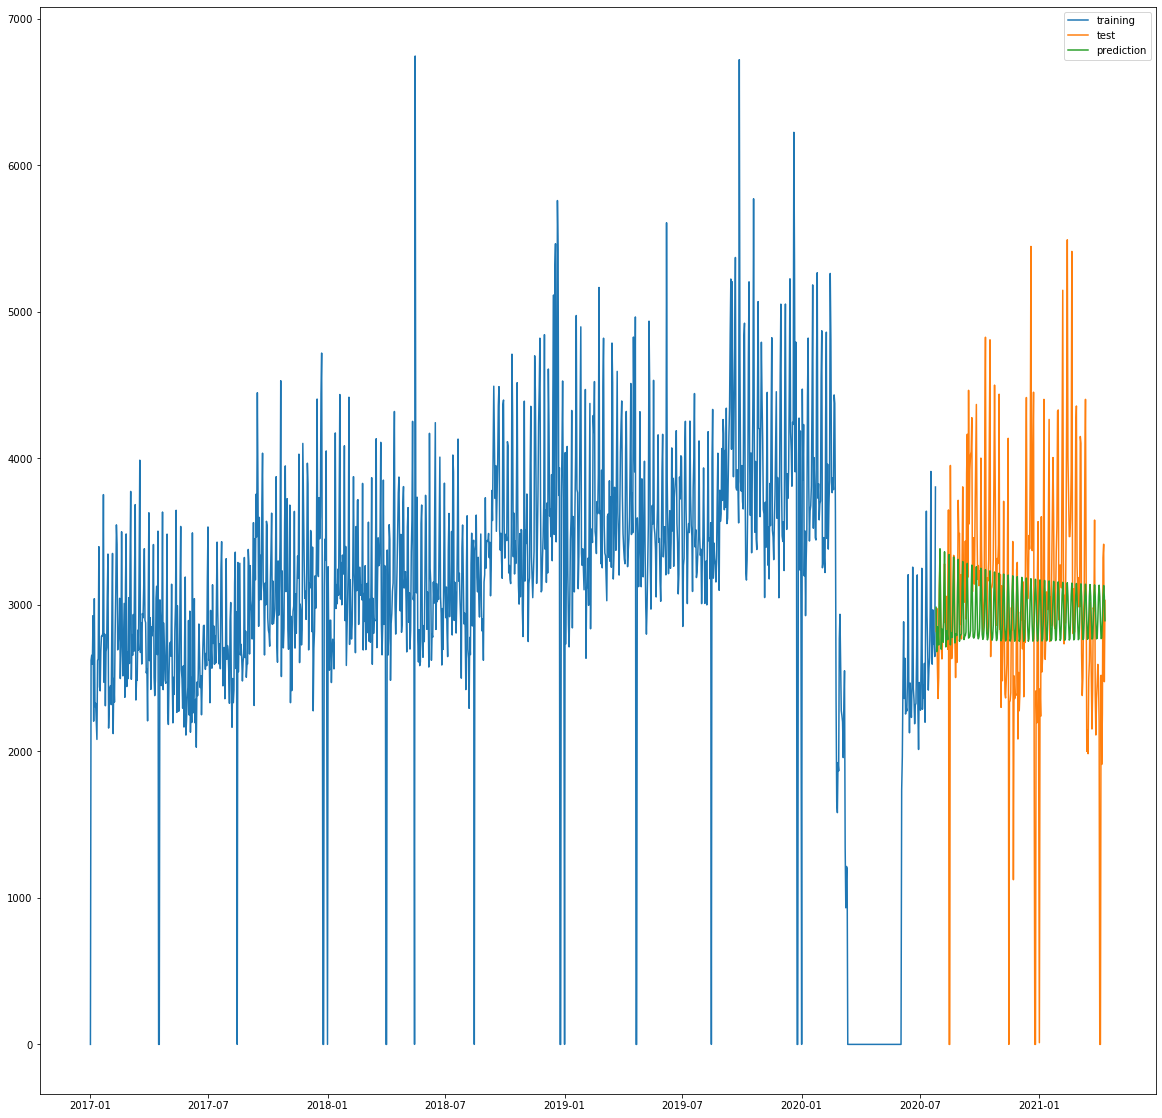

In [32]:
plt.figure(figsize=(20,20))

plt.plot(train,label="training")
plt.plot(test,label="test")
plt.plot(prediction,label="prediction")

plt.legend(loc="best")
plt.show()

In [33]:
from sklearn.metrics import r2_score
test["predicted_sales"]=prediction
r2_score(test["y_values"],test["predicted_sales"])

C:\Users\Lilia\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


0.035325514392887